In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.0 MB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-macosx_11_0_arm64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-10.4.0-cp312-cp312-macosx_11_0_arm64.whl (3.4 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [27]:
import yfinance as yf
import pandas as pd
import matplotlib_inline
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create a ticker object for Tesla (TSLA)
tesla_ticker = yf.Ticker("TSLA")

# Display the ticker object to show it has been created
print(tesla_ticker)


# Reset the index of the dataframe
tesla_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(tesla_data.head())

yfinance.Ticker object <TSLA>
   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [28]:
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable
html_data = response.text

# Display the first 500 characters of the html_data to verify
print(html_data[:500])

# Save the text of the response as a variable
html_data = response.content

# Parse the HTML data using BeautifulSoup with html5lib
soup = BeautifulSoup(html_data, 'html5lib')


# Display the parsed data
print(soup.prettify()[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   T

In [29]:
# Find all tables
tables = soup.find_all('table')

# Identify the relevant table containing "Tesla Quarterly Revenue"
relevant_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        relevant_table = table
        break

# Initialize a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through rows and extract data
for row in relevant_table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    
    # Add row to DataFrame
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Display the DataFrame
print(tesla_revenue.head())

# Display the last five rows of the dataframe
print(tesla_revenue.tail())



         Date Revenue
0  2022-09-30   21454
1  2022-06-30   16934
2  2022-03-31   18756
3  2021-12-31   17719
4  2021-09-30   13757
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


In [30]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gamestop_ticker = yf.Ticker("GME")

# Display the ticker object to show it has been created
print(gamestop_ticker)
# Reset the index of the dataframe
gme_data.reset_index(inplace=True)
# Display the first five rows of the dataframe
print(gme_data.head())



yfinance.Ticker object <GME>
   index                      Date      Open      High       Low     Close  \
0      0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667   
1      1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250   
2      2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   
3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   
4      4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   

     Volume  Dividends  Stock Splits  
0  76216000        0.0           0.0  
1  11021600        0.0           0.0  
2   8389600        0.0           0.0  
3   7410400        0.0           0.0  
4   6892800        0.0           0.0  


In [31]:
import requests

# URL of the webpage to download
url_gme_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response_gme = requests.get(url_gme_revenue)

# Save the text of the response as a variable
html_data_2 = response_gme.text

# Display the first 500 characters to verify
html_data_2[:500]

# Parse the HTML data using BeautifulSoup
soup_gme = BeautifulSoup(html_data_2, 'html.parser')

# Display the parsed data to verify
print(soup_gme.prettify()[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


In [21]:
# Isolate the table
table = soup_gme.find_all("tbody")[1]

# Initialize a DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Loop through rows and extract data
for row in table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace('$', '').replace(',', '')
    
    # Add row to DataFrame
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Display the DataFrame
print(gme_revenue.head())
print(gme_revenue.tail())

         Date Revenue
0  2020-04-30    1021
1  2020-01-31    2194
2  2019-10-31    1439
3  2019-07-31    1286
4  2019-04-30    1548
          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


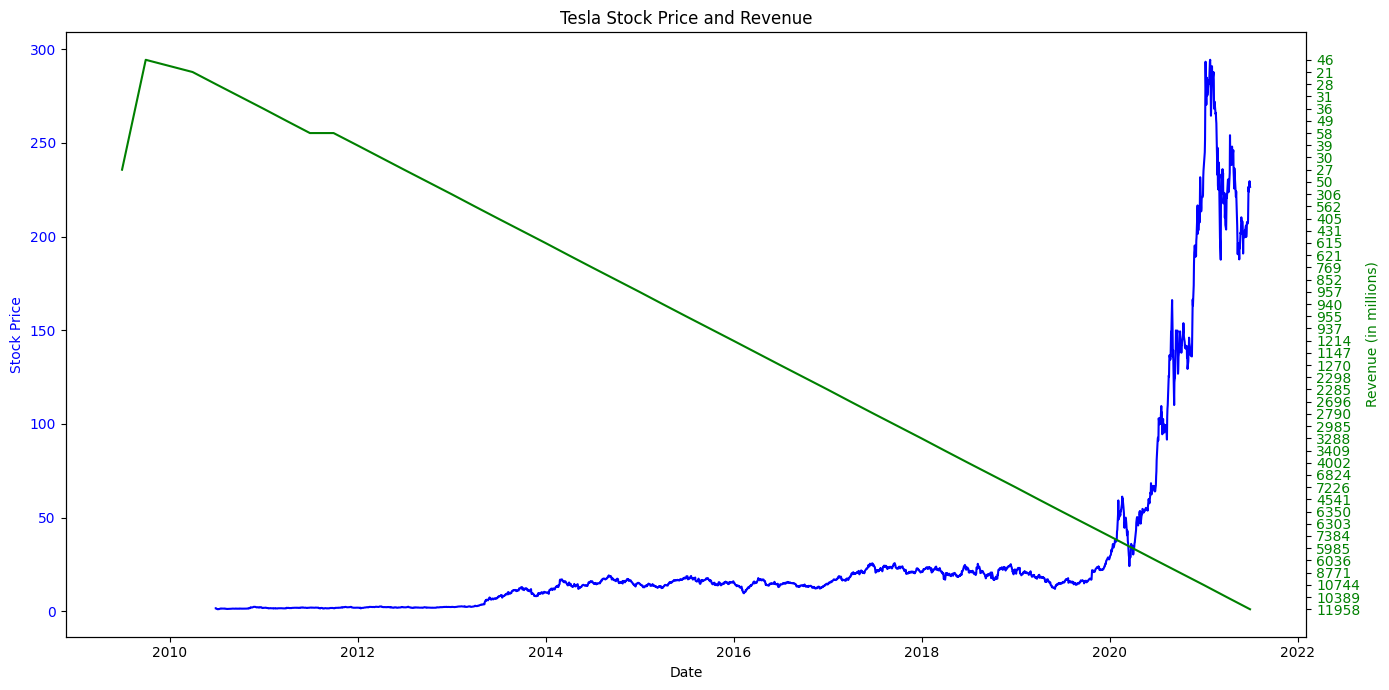

In [22]:
import matplotlib.pyplot as plt

# Function to make the graph
def make_graph(stock_data, revenue_data, company):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Date'], stock_data['Close'], label=f'{company} Stock Price', color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{company} Revenue', color='g')
    ax2.set_ylabel('Revenue (in millions)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'{company} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Convert Date columns to datetime if not already done
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter data up to June 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Plot the Tesla Stock graph
make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla')


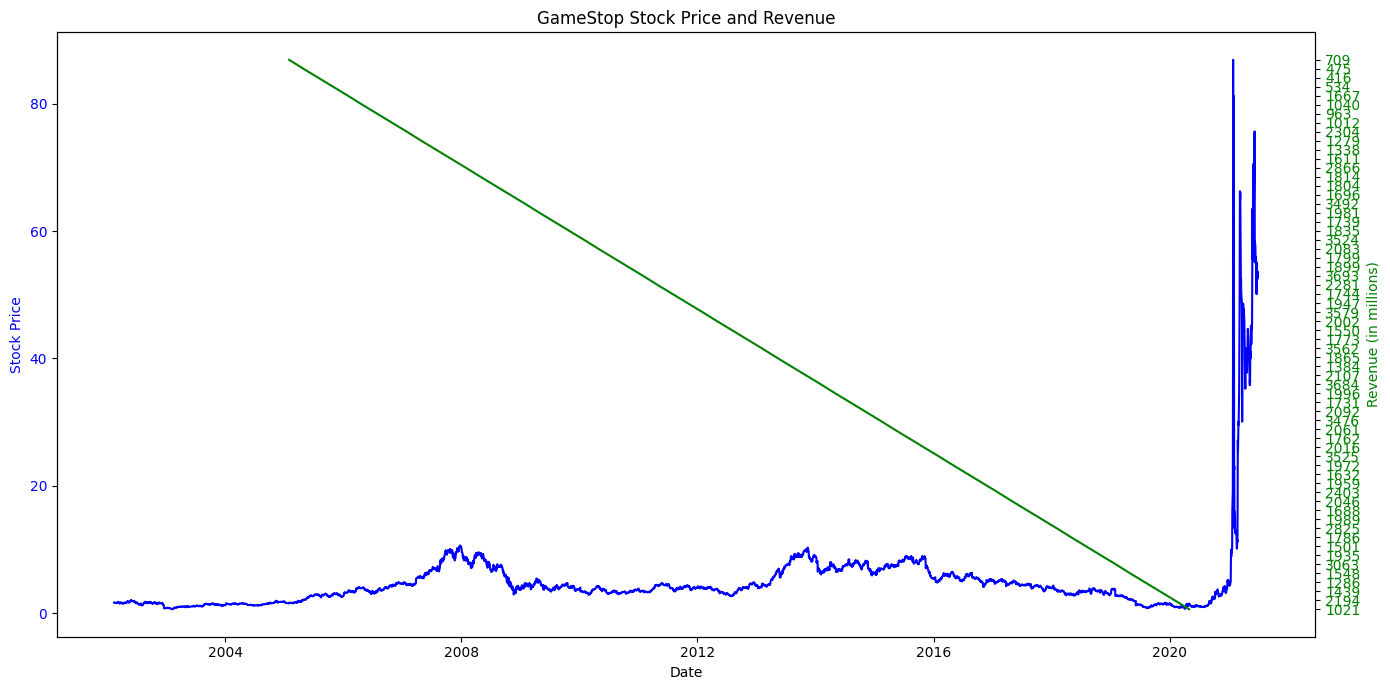

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming gme_data and gme_revenue are already prepared as per the earlier instructions

# Convert Date columns to datetime if not already done
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Function to make the graph
def make_graph(stock_data, revenue_data, company):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    ax1.plot(stock_data['Date'], stock_data['Close'], label=f'{company} Stock Price', color='b')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label=f'{company} Revenue', color='g')
    ax2.set_ylabel('Revenue (in millions)', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'{company} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Filter data up to June 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Plot the GameStop Stock graph
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')
